# Intro to Machine Learning Homework 4 SVM

### Bryce Readyhough 
### ID-801005029

Importing the dataset. This will be used for the SVM portion of this homework. In this case the dataset will be downloaded from SKlearn rather than imported from a CSV.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer #Importing the breast cancer dataset

In [2]:
breast = load_breast_cancer()

In [3]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [4]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_labels = breast.target

In [6]:
breast_labels.shape

(569,)

In [7]:
labels = np.reshape(breast_labels,(569,1))

In [8]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [9]:
breast_dataset = pd.DataFrame(final_breast_data)

In [10]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
feature_labels = np.append(features,'label')
breast_dataset.columns = feature_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X2 = breast_dataset.iloc[:,0:30].values
print(X2[:2])
Y2 = breast_dataset.iloc[:,30].values
print(Y2[:2])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
[0. 0.]


In [15]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Using an RBF Kernel

In [16]:
prob2Data = []
classifier = SVC(kernel='rbf', C=1E10)
for i in range(29,3,-1):
    N = i
    #prob2Accuracy.append([N,1])
    pca = PCA(N)
    principalComponents = pca.fit_transform(X2)
    principalDf = pd.DataFrame(data = principalComponents, columns = range(N))
    finalDf = pd.concat([principalDf, breast_dataset[['label']]],axis = 1)
    #print(finalDf.head())
    Y2 = finalDf.iloc[:,[N]].values
    X2PCA = finalDf.iloc[:,0:(N-1)]

    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2PCA, Y2, test_size = 0.2, random_state = 1, shuffle = True)
    print(N)
    classifier.fit(X2_train, np.ravel(Y2_train))
    Y2_pred = classifier.predict(X2_test)

    cnf_matrix2 = confusion_matrix(Y2_test, Y2_pred)
    accuracy = metrics.accuracy_score(Y2_test, Y2_pred)
    precisison = metrics.precision_score(Y2_test, Y2_pred)
    recall = metrics.recall_score(Y2_test, Y2_pred)

    prob2Data.append([N,accuracy,precisison,recall])
    

29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4


In [17]:
print(prob2Data)

[[29, 0.9210526315789473, 0.9090909090909091, 0.9722222222222222], [28, 0.9298245614035088, 0.9210526315789473, 0.9722222222222222], [27, 0.9385964912280702, 0.9333333333333333, 0.9722222222222222], [26, 0.9298245614035088, 0.9210526315789473, 0.9722222222222222], [25, 0.9385964912280702, 0.9333333333333333, 0.9722222222222222], [24, 0.9210526315789473, 0.9090909090909091, 0.9722222222222222], [23, 0.9298245614035088, 0.9210526315789473, 0.9722222222222222], [22, 0.9385964912280702, 0.9333333333333333, 0.9722222222222222], [21, 0.9298245614035088, 0.9210526315789473, 0.9722222222222222], [20, 0.9385964912280702, 0.9333333333333333, 0.9722222222222222], [19, 0.9210526315789473, 0.9090909090909091, 0.9722222222222222], [18, 0.9210526315789473, 0.9090909090909091, 0.9722222222222222], [17, 0.9298245614035088, 0.9210526315789473, 0.9722222222222222], [16, 0.9122807017543859, 0.9078947368421053, 0.9583333333333334], [15, 0.9298245614035088, 0.9210526315789473, 0.9722222222222222], [14, 0.93

In [16]:
#function to get specific items from lists
def Extract(lst, i):
    return [item[i] for item in lst]

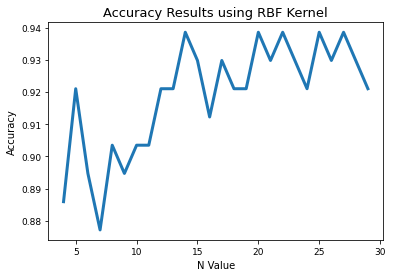

In [18]:


N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,1)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Accuracy Results using RBF Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

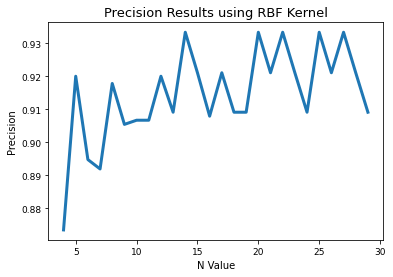

In [19]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,2)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Precision Results using RBF Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Precision", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

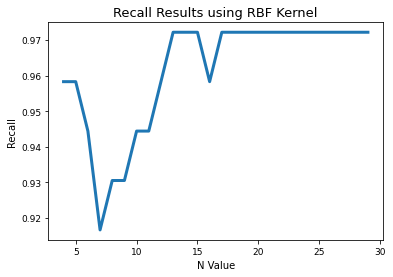

In [20]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,3)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Recall Results using RBF Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Recall", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

## Using a Polynomial Kernel

In [ ]:
prob2Data = []
classifier = SVC(kernel='poly', C=1E9)
for i in range(29,5,-1):
    N = i
    #prob2Accuracy.append([N,1])
    pca = PCA(N)
    principalComponents = pca.fit_transform(X2)
    principalDf = pd.DataFrame(data = principalComponents, columns = range(N))
    finalDf = pd.concat([principalDf, breast_dataset[['label']]],axis = 1)
    #print(finalDf.head())
    Y2 = finalDf.iloc[:,[N]].values
    X2PCA = finalDf.iloc[:,0:(N-1)]

    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2PCA, Y2, test_size = 0.2, random_state = 1, shuffle = True)
    print(N)
    classifier.fit(X2_train, np.ravel(Y2_train))
    Y2_pred = classifier.predict(X2_test)

    cnf_matrix2 = confusion_matrix(Y2_test, Y2_pred)
    accuracy = metrics.accuracy_score(Y2_test, Y2_pred)
    precisison = metrics.precision_score(Y2_test, Y2_pred)
    recall = metrics.recall_score(Y2_test, Y2_pred)

    prob2Data.append([N,accuracy,precisison,recall])
    

29


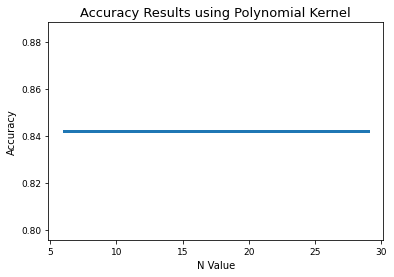

In [19]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,1)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Accuracy Results using Polynomial Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

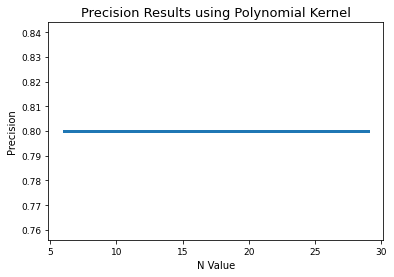

In [20]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,2)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Precision Results using Polynomial Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Precision", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

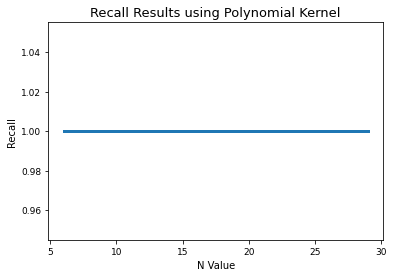

In [21]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,3)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Recall Results using Polynomial Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Recall", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

## Using a Linear Kernel

In [ ]:
prob2Data = []
classifier = SVC(kernel='linear', C=1E10)
for i in range(29,23,-1):
    N = i
    #prob2Accuracy.append([N,1])
    pca = PCA(N)
    principalComponents = pca.fit_transform(X2)
    principalDf = pd.DataFrame(data = principalComponents, columns = range(N))
    finalDf = pd.concat([principalDf, breast_dataset[['label']]],axis = 1)
    #print(finalDf.head())
    Y2 = finalDf.iloc[:,[N]].values
    X2PCA = finalDf.iloc[:,0:(N-1)]

    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2PCA, Y2, test_size = 0.2, random_state = 1, shuffle = True)
    print(N)
    classifier.fit(X2_train, np.ravel(Y2_train))
    Y2_pred = classifier.predict(X2_test)

    cnf_matrix2 = confusion_matrix(Y2_test, Y2_pred)
    accuracy = metrics.accuracy_score(Y2_test, Y2_pred)
    precisison = metrics.precision_score(Y2_test, Y2_pred)
    recall = metrics.recall_score(Y2_test, Y2_pred)

    prob2Data.append([N,accuracy,precisison,recall])
    

29


In [ ]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,1)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Accuracy Results using Linear Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

In [ ]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,2)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Precision Results using Linear Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Precision", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

In [ ]:
N_Values = Extract(prob2Data,0)
Accuracy_Values = Extract(prob2Data,3)

plt.plot(N_Values, Accuracy_Values, linewidth=3)
plt.title("Recall Results using Linear Kernel", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Recall", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()